In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Childhood Respiratory Disease

Keywords: polynomial regression, multiple regression.

## Description

FEV (forced expiratory volume) is an index of pulmonary function that measures the volume of air expelled after one second of constant effort. The data contains determinations of FEV on 654 children ages 6-22 who were seen in the Childhood Respiratory Desease Study in 1980 in East Boston, Massachusetts. The data are part of a larger study to follow the change in pulmonary function over time in children.

ID	 - 	ID number
Age	 - 	years
FEV	 - 	litres
Height	 - 	inches
Sex	 - 	Male or Female
Smoker	 - 	Non = nonsmoker, Current = current smoker


## Source

Tager, I. B., Weiss, S. T., Rosner, B., and Speizer, F. E. (1979). Effect of parental cigarette smoking on pulmonary function in children. American Journal of Epidemiology, 110, 15-26.
Rosner, B. (1990). Fundamentals of Biostatistics, 3rd Edition. PWS-Kent, Boston, Massachusetts.


In [5]:
# Read the csv file into a pandas DataFrame

smoking = pd.read_csv('../Resources/smoking.csv')
smoking.head()

Id  Age    FEV  Height     Sex Smoker
0  301    9  1.708    57.0  Female    Non
1  451    8  1.724    67.5  Female    Non
2  501    7  1.720    54.5  Female    Non
3  642    9  1.558    53.0    Male    Non
4  901    9  1.895    57.0    Male    Non

In [11]:
# Use Pandas get_dummies to convert categorical data

X = smoking[["Age","Height","Sex","Smoker"]]
y = smoking["FEV"].values.reshape(-1, 1)
print(X.shape, y.shape)


data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()


from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

# YOUR CODE HERE

(654, 4) (654, 1)


Age  Height  Sex_Female  Sex_Male  Smoker_Current  Smoker_Non
328   11    63.0           1         0               0           1
210    9    59.0           1         0               0           1
140    7    58.0           0         1               0           1
338   12    64.0           1         0               0           1
43     8    57.0           1         0               0           1

In [12]:
# Assign X (data) and y (target)



# YOUR CODE HERE

In [ ]:
# Split the data into training and testing

# YOUR CODE HERE

In [15]:


from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Create a StandardScater model and fit it to the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
# YOUR CODE HERE

C:\Users\Aamber-PC\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aamber-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Aamber-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models

# YOUR CODE HERE

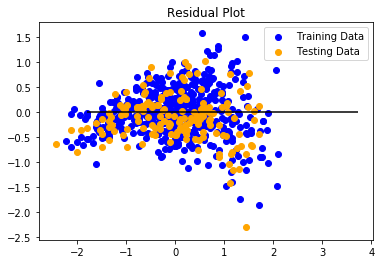

In [16]:
# Create a LinearRegression model and fit it to the scaled training data
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
# YOUR CODE HERE

In [ ]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

# YOUR CODE HERE

In [17]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

# YOUR CODE HERE
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.22950241298678842, R2: 0.7942752523744798


In [18]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.22950241298678842, R2: 0.7942752523744798


In [ ]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

# YOUR CODE HERE

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

# YOUR CODE HERE

print(f"MSE: {MSE}, R2: {r2}")